In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv'
data = pd.read_csv(file_path)

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data['Attrition'] = LabelEncoder().fit_transform(data['Attrition'])

In [7]:
data = pd.get_dummies(data, drop_first=True)

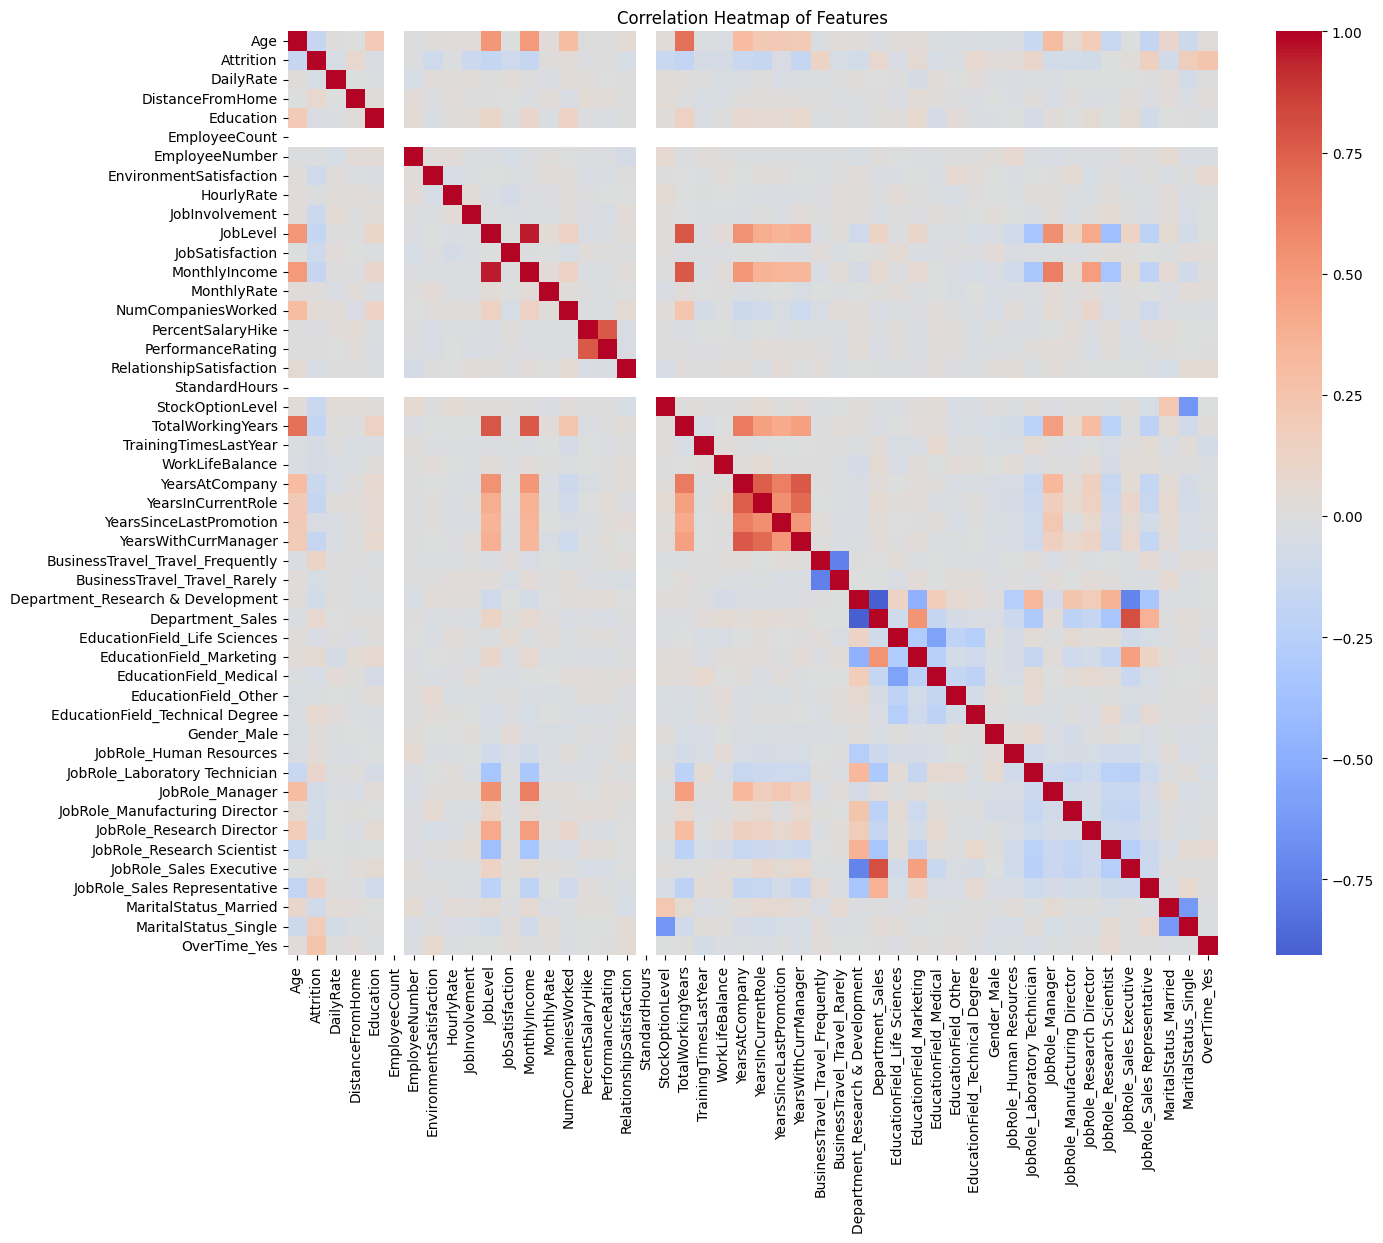

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

In [9]:
attrition_correlation = correlation_matrix["Attrition"]
threshold = 0.15

strong_attrition_correlation = attrition_correlation[abs(attrition_correlation) > threshold]

print("Features strongly correlated with Attrition:\n", strong_attrition_correlation)


Features strongly correlated with Attrition:
 Age                            -0.159205
Attrition                       1.000000
JobLevel                       -0.169105
MonthlyIncome                  -0.159840
TotalWorkingYears              -0.171063
YearsInCurrentRole             -0.160545
YearsWithCurrManager           -0.156199
JobRole_Sales Representative    0.157234
MaritalStatus_Single            0.175419
OverTime_Yes                    0.246118
Name: Attrition, dtype: float64


In [10]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y):
    y_pred = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='binary')
    recall = recall_score(y, y_pred, average='binary')
    f1 = f1_score(y, y_pred, average='binary')
    return accuracy, precision, recall, f1

def build_single_layer_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
single_lstm_model = build_single_layer_lstm(input_shape)

single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8121 - loss: 0.5984
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8469 - loss: 0.4164
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8398 - loss: 0.4051
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.3783
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8321 - loss: 0.3877
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8422 - loss: 0.3540
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8538 - loss: 0.3538
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.3559
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8556 - loss: 0.3488
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8768 - loss: 0.3292
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8832 - loss: 0.3155
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.3497


In [16]:
train_results = evaluate_model(single_lstm_model, X_train, y_train)
print("Single-layer LSTM Training Results:")
print(f"Accuracy: {train_results[0]:.4f}, Precision: {train_results[1]:.4f}, Recall: {train_results[2]:.4f}, F1 Score: {train_results[3]:.4f}")

test_results = evaluate_model(single_lstm_model, X_test, y_test)
print("\nSingle-layer LSTM Test Results:")
print(f"Accuracy: {test_results[0]:.4f}, Precision: {test_results[1]:.4f}, Recall: {test_results[2]:.4f}, F1 Score: {test_results[3]:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Single-layer LSTM Training Results:
Accuracy: 0.9005, Precision: 0.7914, Recall: 0.5556, F1 Score: 0.6528
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Single-layer LSTM Test Results:
Accuracy: 0.8844, Precision: 0.5862, Recall: 0.4359, F1 Score: 0.5000


In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y):
    y_pred = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='binary')
    recall = recall_score(y, y_pred, average='binary')
    f1 = f1_score(y, y_pred, average='binary')
    return accuracy, precision, recall, f1

def build_bidirectional_lstm(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(50), input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
bidirectional_lstm_model = build_bidirectional_lstm(input_shape)

bidirectional_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8289 - loss: 0.5470
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8177 - loss: 0.4452
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8437 - loss: 0.3860
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8236 - loss: 0.4036
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8641 - loss: 0.3344
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.3451
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8568 - loss: 0.3428
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8579 - loss: 0.3406
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8582 - loss: 0.3508
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8872 - loss: 0.2935
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8799 - loss: 0.3089
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.3096


In [18]:
train_results = evaluate_model(bidirectional_lstm_model, X_train, y_train)
print("Bidirectional LSTM Training Results:")
print(f"Accuracy: {train_results[0]:.4f}, Precision: {train_results[1]:.4f}, Recall: {train_results[2]:.4f}, F1 Score: {train_results[3]:.4f}")

test_results = evaluate_model(bidirectional_lstm_model, X_test, y_test)
print("\nBidirectional LSTM Test Results:")
print(f"Accuracy: {test_results[0]:.4f}, Precision: {test_results[1]:.4f}, Recall: {test_results[2]:.4f}, F1 Score: {test_results[3]:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Bidirectional LSTM Training Results:
Accuracy: 0.9031, Precision: 0.8818, Recall: 0.4899, F1 Score: 0.6299
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Bidirectional LSTM Test Results:
Accuracy: 0.8946, Precision: 0.7000, Recall: 0.3590, F1 Score: 0.4746


In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y):
    y_pred = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='binary')
    recall = recall_score(y, y_pred, average='binary')
    f1 = f1_score(y, y_pred, average='binary')
    return accuracy, precision, recall, f1


def build_stacked_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
stacked_lstm_model = build_stacked_lstm(input_shape)


stacked_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8089 - loss: 0.6424
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8384 - loss: 0.4332
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8476 - loss: 0.3962
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8498 - loss: 0.3696
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8125 - loss: 0.4053
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8318 - loss: 0.3723
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8530 - loss: 0.3615
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8688 - loss: 0.3197
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8786 - loss: 0.3283
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8562 - loss: 0.3656
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8614 - loss: 0.3331
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8899 - loss: 0.2965


In [20]:
train_results = evaluate_model(stacked_lstm_model, X_train, y_train)
print("Stacked LSTM Training Results:")
print(f"Accuracy: {train_results[0]:.4f}, Precision: {train_results[1]:.4f}, Recall: {train_results[2]:.4f}, F1 Score: {train_results[3]:.4f}")

test_results = evaluate_model(stacked_lstm_model, X_test, y_test)
print("\nStacked LSTM Test Results:")
print(f"Accuracy: {test_results[0]:.4f}, Precision: {test_results[1]:.4f}, Recall: {test_results[2]:.4f}, F1 Score: {test_results[3]:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Stacked LSTM Training Results:
Accuracy: 0.9133, Precision: 0.8582, Recall: 0.5808, F1 Score: 0.6928
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Stacked LSTM Test Results:
Accuracy: 0.8776, Precision: 0.5652, Recall: 0.3333, F1 Score: 0.4194


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_sklearn_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    return accuracy, precision, recall, f1

In [22]:

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshape to (samples, time steps * features)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logistic_model = LogisticRegression(max_iter=50)

logistic_model.fit(X_train_reshaped, y_train)


y_train_pred = logistic_model.predict(X_train_reshaped)


train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

y_test_pred = logistic_model.predict(X_test_reshaped)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')


In [24]:

print("Training Results:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")


print("\nTest Results:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")

Training Results:
Accuracy: 0.8937, Precision: 0.8877, Recall: 0.8937, F1 Score: 0.8818

Test Results:
Accuracy: 0.8912, Precision: 0.8764, Recall: 0.8912, F1 Score: 0.8767


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


decision_tree_model = DecisionTreeClassifier()


decision_tree_model.fit(X_train_reshaped, y_train)


y_train_pred = decision_tree_model.predict(X_train_reshaped)


train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')


y_test_pred = decision_tree_model.predict(X_test_reshaped)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Decision Tree Training Results:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")


print("\nDecision Tree Test Results:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")


Decision Tree Training Results:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000

Decision Tree Test Results:
Accuracy: 0.7619, Precision: 0.7811, Recall: 0.7619, F1 Score: 0.7711


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


svm_model = SVC()


svm_model.fit(X_train_reshaped, y_train)


y_train_pred = svm_model.predict(X_train_reshaped)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')


y_test_pred = svm_model.predict(X_test_reshaped)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("SVM Training Results:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")


print("\nSVM Test Results:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")


SVM Training Results:
Accuracy: 0.9005, Precision: 0.9097, Recall: 0.9005, F1 Score: 0.8829

SVM Test Results:
Accuracy: 0.8946, Precision: 0.8887, Recall: 0.8946, F1 Score: 0.8693
